<a href="https://colab.research.google.com/github/Abhik-Biswas/Covid-19-Chest-X-Ray-Classification_CNN/blob/main/Covid_19_Lungs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset: http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2021-12-19 13:49:02--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-12-19 13:49:02--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-12-19 13:49:03--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-12

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_DIR = "CovidDataset/Train"
VAL_DIR = "CovidDataset/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [25]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 224 images belonging to 2 classes.


In [27]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [28]:
val_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32, 
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [29]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 6,
    epochs = 8,
    validation_data = val_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/8
6/6 [==============================] - 12s 2s/step - loss: 0.9376 - accuracy: 0.5469 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 2/8
6/6 [==============================] - 10s 2s/step - loss: 0.6651 - accuracy: 0.5990 - val_loss: 0.6500 - val_accuracy: 0.9000
Epoch 3/8
6/6 [==============================] - 10s 2s/step - loss: 0.5646 - accuracy: 0.7188 - val_loss: 0.5364 - val_accuracy: 0.6833
Epoch 4/8
6/6 [==============================] - 10s 2s/step - loss: 0.4250 - accuracy: 0.8281 - val_loss: 0.3789 - val_accuracy: 0.8667
Epoch 5/8
6/6 [==============================] - 10s 2s/step - loss: 0.2867 - accuracy: 0.8958 - val_loss: 0.1908 - val_accuracy: 0.9500
Epoch 6/8
6/6 [==============================] - 10s 2s/step - loss: 0.2782 - accuracy: 0.8750 - val_loss: 0.2688 - val_accuracy: 0.9833
Epoch 7/8
6/6 [==============================] - 10s 2s/step - loss: 0.2365 - accuracy: 0.9167 - val_loss: 0.1705 - val_accuracy: 0.9833
Epoch 8/8
6/6 [==========================

In [30]:
model.save("model_1.h5")

In [31]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.15975333750247955, 0.9330357313156128]

In [32]:
model.evaluate_generator(val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.11738816648721695, 0.9833333492279053]

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
import os
model1 = load_model('model_1.h5')

In [35]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [36]:
y_actual = []
y_test = []

In [41]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model1.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
y_test

In [43]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model1.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [51]:
y_actual = np.array(y_actual)
y_test = np.array(y_test, dtype='int')

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_actual, y_test)

array([[27,  3],
       [ 1, 29]])

In [54]:
import seaborn as sns

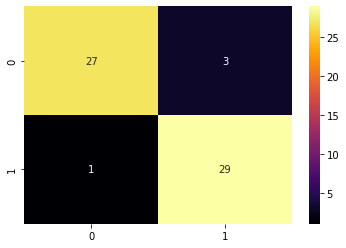

In [57]:
sns.heatmap(confusion_matrix(y_actual, y_test), cmap = 'inferno', annot = True)

True